# Homework Assignment 6
## Mindy Tran
-----------------------------------
**Question 1:** The time to fixation of an allele is defined as the number of
generations that it takes to go from frequency $1/2N$ to 1.0. Using the drift2() 
function that we wrote in the week6 notebook we are going to use simulations
 to derive the relationship between time to fixation and population size. Using a 
 population size of $N = 10, 50, 100, 500$, start replicate populations off with an 
 allele at frequency $1/2N$, as if it were a new allele, and run them for long enough
 that alleles go to fixation or loss. Then summarize how many generations it takes
 for fixation to occur. Be sure to ignore loss of the allele. Plot that simulated
 average fixation time versus population size. Write a sentence or two explaining what you observe.

In [5]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [75]:
def drift2(N, p0, gens, reps):
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    for i in range(1,gens):
        p_N = np.array([np.random.binomial(N,x) for x in p[i-1,:]])
        p[i,:] = p_N/ N
    return(p)

Ns = [10,50,100,500]

In [137]:
def avg_fixation_gen(N):
    x = drift2(N,0.5,100,10_000)

    # generations where fixation occurs
    fix_time = []
    for i in x:
        num_ones = (i == 1).sum()
        fix_time.append(num_ones)
    fix_time = np.array(fix_time)

    # summarize how many generations it takes for fixation to occur
    fixation_gen = np.where(fix_time[:-1] != fix_time[1:])[0] + 2

    return np.mean(fixation_gen)


avg_fixation_gens = []
for N in Ns:
    N_gen = [avg_fixation_gen(N) for i in range(50)]
    avg_fixation_gens.append(N_gen)


Text(0.5, 0, 'Population Size')

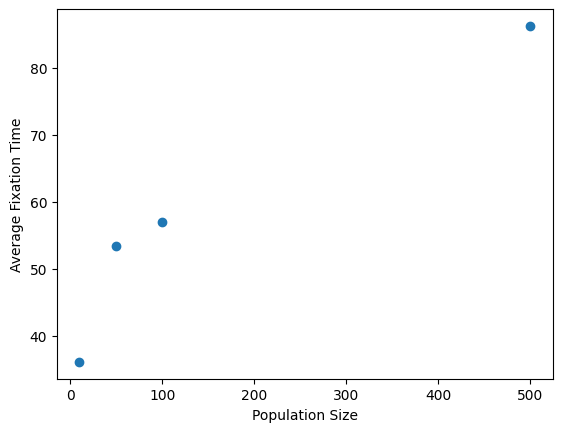

In [140]:
y = [np.mean(item) for item in avg_fixation_gens]
# Plot that simulated average fixation time versus population size. 
plt.scatter(Ns, y)
plt.ylabel('Average Fixation Time')
plt.xlabel("Population Size")

*Write a sentence or two explaining what you observe.*

As the population increases, it takes increasingly more generations to reach fixation.

**Question 2:** Do exactly the same thing as above, computing the time to fixation, but now use the `selectionPlusDrift()` function from that same notebook. For this exercise, hold $N$ constant at $N = 500$ and vary selection against the $A_2$ allele by using the following three vectors of selection coefficients: $w=[1, 0.99, 0.98], [1, 0.98, 0.96], [1, 0.95, 0.9]$. Write a few sentences about what you notice and produce a plot of fixation time vs selection coefficient against the $A_2$ allele, that is $s = 1 - w_{22}$.
 

In [144]:
def wbar(p, w_vec):
    """
    compute the mean fitness from vector of geno fitnesses
    and p the current allele freq
    """
    q = 1 - p
    wbar = (p**2 * w_vec[0]) + (2 * p * q * w_vec[1]) + (q**2 * w_vec[2])
    return(wbar)

def p_prime(p, w_vec):
    wb = wbar(p, w_vec)
    p_p = (p**2 * w_vec[0]) + (p * (1 - p) * w_vec[1])
    return(p_p / wb)

def selection(N, p0, w_vec, gens, reps):
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    # renormalize w_vec just in case
    max_val = np.max(w_vec)
    w_vec = [x / max_val for x in w_vec]
    # main loop
    for i in range(1,gens):
        pp = np.array([p_prime(x, w_vec) for x in p[i-1,:]])
        p[i,:] = pp
    return(p)

def selectionPlusDrift(N, p0, w_vec, gens, reps):
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    # renormalize w_vec just in case
    max_val = np.max(w_vec)
    w_vec = [x / max_val for x in w_vec]
    # main loop
    for i in range(1,gens):
        pp = np.array([p_prime(x, w_vec) for x in p[i-1,:]]) # selection 
        p_N = np.array([np.random.binomial(N,x) for x in pp]) # now drift
        p[i,:] = p_N / N # divide by popn size to get freqs
    return(p)


In [163]:
N = 500
w = [[1, 0.99, 0.98], [1, 0.98, 0.96], [1, 0.95, 0.9]]

def avg_fixation_gen2(w_vec):
    x = selectionPlusDrift(N, 0.01, w_vec, 1000, 100)

    # generations where fixation occurs
    fix_time = []
    for i in x:
        num_ones = (i == 1).sum()
        fix_time.append(num_ones)
    fix_time = np.array(fix_time)

    # summarize how many generations it takes for fixation to occur
    fixation_gen = np.where(fix_time[:-1] != fix_time[1:])[0] + 2

    return np.mean(fixation_gen)


# np.mean([ avg_fixation_gen2(w[0]) for i in range(10) ])
avg_fixation_gens2 = []
for w_vec in w:
    N_gen = [avg_fixation_gen2(w_vec) for i in range(10)]
    avg_fixation_gens2.append(N_gen)  
# avg_fixation_gens2

Text(0.5, 0, 'w vector: w = [[1, 0.99, 0.98], [1, 0.98, 0.96], [1, 0.95, 0.9]]')

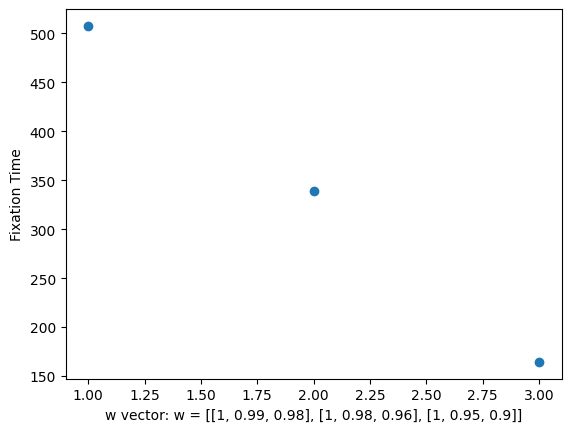

In [166]:
y = [np.mean(item) for item in avg_fixation_gens2]
# Plot that simulated average fixation time versus population size. 
plt.scatter([1,2,3], y)
plt.ylabel('Fixation Time')
plt.xlabel("w vector: w = [[1, 0.99, 0.98], [1, 0.98, 0.96], [1, 0.95, 0.9]]")